In [2]:
import numpy as np
import psana
import matplotlib.pyplot as plt
import h5py

from utils import *
from scipy.signal import find_peaks, peak_widths





In [ ]:
run =27
with h5py.File(f'{H5_FOLDER}/r{int(run):04d}_high_intens_shots.h5', 'r') as f:
    shots = f['/shots'][:]
    timestamps = f['/timestamps'][:]

ds = psana.DataSource(f'exp={EXP_NAME}:run={run}:smd')
det = psana.Detector(DET_NAME)
for evt in ds.events():
    break


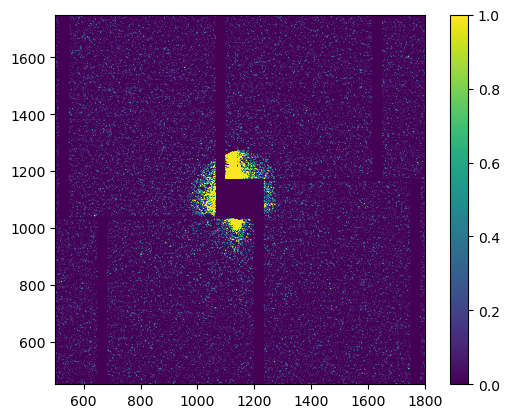

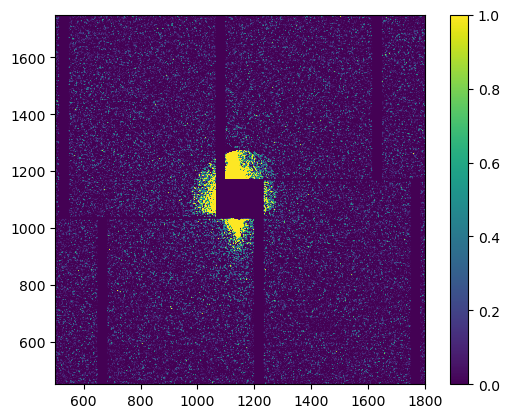

In [28]:
shot = det.image(evt, shots[4])
plt.figure()
plt.imshow(shot, vmin=0, vmax=1)
assem_plot_zoom()
plt.colorbar()
shot = det.image(evt, shots[1050])
plt.figure()
plt.imshow(shot, vmin=0, vmax=1)
assem_plot_zoom()
plt.colorbar()

/lscratch/padams/tmp/ipykernel_1323994/2640520133.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(r_buffer, np.log10(i_buffer[:-1]))
/lscratch/padams/tmp/ipykernel_1323994/2640520133.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.plot(rx, np.log10(iy[:-1]))


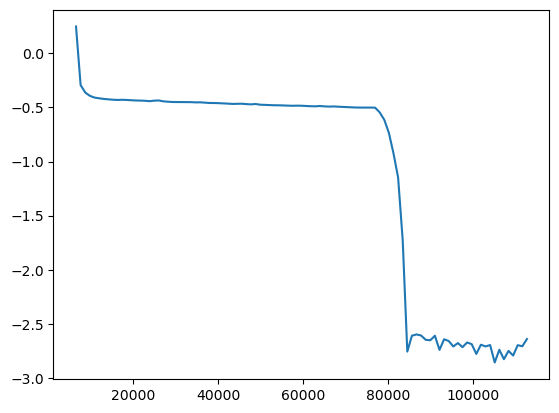

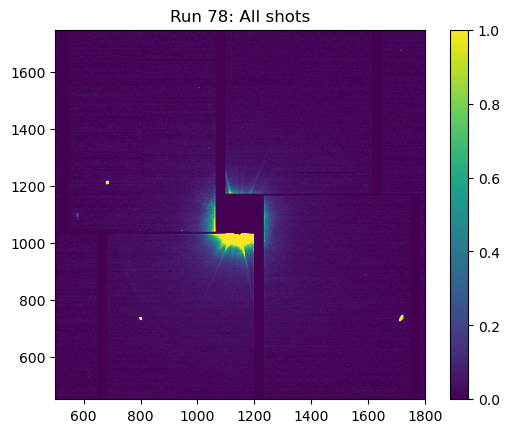

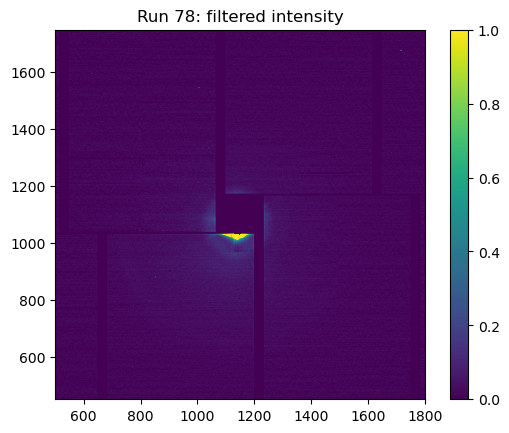

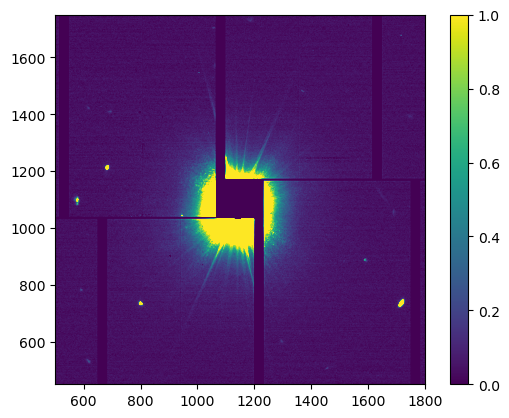

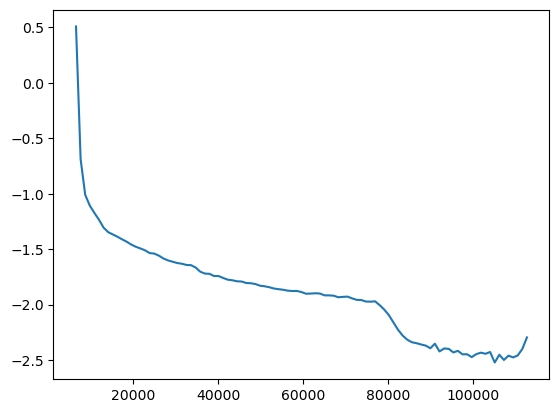

In [48]:
r_buffer, i_buffer = get_run_azimuthal_average(84, suff='_intens_filt')
plt.figure()
plt.plot(r_buffer, np.log10(i_buffer[:-1]))


xy1 = get_run_assem_mean(78)
xy2 = get_run_assem_mean(78, suff='_intens_filt')
xy3 = get_run_assem_mean(78, suff='_high_intens_filt')

#xy2 = xy2-

plt.figure()
plt.title('Run 78: All shots')
plt.imshow(xy1, vmin=0, vmax=1)
plt.colorbar()
assem_plot_zoom()

plt.figure()
plt.title('Run 78: filtered intensity')
plt.imshow(xy2, vmin=0, vmax=1)
plt.colorbar()
assem_plot_zoom()

plt.figure()
plt.imshow(xy3, vmin=0, vmax=1)
plt.colorbar()
assem_plot_zoom()

rx, iy = get_run_azimuthal_average(78, suff='_intens_filt')
plt.figure()
plt.plot(rx, np.log10(iy[:-1]))

#x, y = get_run_azimuthal_average(27, suff='_high_intens_filt')
#plt.figure()
#plt.plot(x,np.log10(y[:-1]))

78


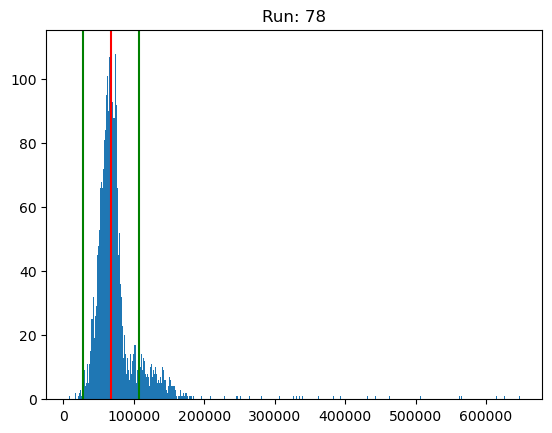

In [31]:
darks = [16,18,19,23,42,55]
junk = [33, 34, 38, 40]
gold_buff = [48, 49, 50, 51]

runs = [i for i in range(27, 54)]

runs = [78]

for run in runs:
    if run in darks: continue
    if run in junk: continue
    if run in gold_buff: continue

    print(run)
    
    timestamps, run_intens = get_run_intens(run)

    med = np.median(run_intens)
    
    loc = np.where(run_intens < 10*med)
    timestamps, run_intens = timestamps[loc], run_intens[loc]

    loc = np.where(run_intens > med/10)
    timestamps, run_intens = timestamps[loc], run_intens[loc]
    
    p16 = np.percentile(run_intens, 16)
    p84 = np.percentile(run_intens, 84)
    wid = p84 - p16
    
    #peaks, properties = find_peaks(hist, height=0.9, prominence=1)

    #wid = 1e5
    plt.figure()
    plt.title(f'Run: {run}')
    hist , bins, _= plt.hist(run_intens, bins=500)

    plt.axvline(x=med, ymin=0, ymax=np.max(hist), color='r')
    plt.axvline(x=med+wid, ymin=0, ymax=np.max(hist), color='g')
    plt.axvline(x=med-wid, ymin=0, ymax=np.max(hist), color='g')
    
   
   